In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data/kv_listings_with_accessibility_and_noise.csv")
print(df.head())

   Index                                            Address  Room Count  \
0      1  Tartu, Tartu linn, Raadi-Kruusamäe, Kaupmehe t...           3   
1      2                         Tartu, Ülejõe, Staadioni 3           4   
2      3  Tartu, Tartu linn, Raadi-Kruusamäe, Kaupmehe t...           2   
3      4                             Tartu, Ülejõe, Pikk 76           2   
4      5  Tartu, Tartu linn, Raadi-Kruusamäe, Kaupmehe t...           4   

      Size      Price  Teenus_arv Teenustase  Tookoht_protsent  Kool_arv  \
0  64.3 m²  175 900 €         0.0          0          0.000000       0.0   
1    75 m²  235 000 €        37.0   Hea tase         58.684642       2.0   
2  50.8 m²  160 900 €         0.0          0          0.000000       0.0   
3  38.3 m²   89 000 €        33.0   Hea tase         58.533192       2.0   
4    83 m²  209 900 €         4.0          -          6.270224       0.0   

   Lasteaed_arv  Toidupood_arv  Toidukoht_arv  Parkimisnorm  \
0           0.0            0.

In [3]:
df = df.drop(columns=["Index", "Address"])

df["Teenustase"] = df["Teenustase"].replace("-", 0).replace("Baastase", 1).replace("Hea tase", 2)

df["Price"] = df["Price"].str.replace("€", "").str.replace(",", "").str.replace(" ","").astype(float)
df["Size"] = df["Size"].str.replace("m²", "").astype(float)
df["Room Count"] = df["Room Count"].astype(float)

# Calculate price per square meter
df["Price per m2"] = df["Price"] / df["Size"]

# Remove outliers of latitude and longitude
df = df[(df["Latitude"] > 58.2) & (df["Latitude"] < 58.44)]
df = df[(df["Longitude"] > 26.65) & (df["Longitude"] < 226.9)]

Toidukoht_arv          0.324625
Teenus_arv             0.291256
Tookoht_protsent       0.155176
Latitude               0.148148
Noise                  0.113898
Toidupood_arv          0.061296
Teenustase             0.058489
Lasteaed_arv          -0.111592
Parkimis_koefitsent   -0.131927
Parkimisnorm          -0.132180
Size                  -0.162497
Room Count            -0.176295
Kool_arv              -0.218542
Longitude             -0.288090
Distance              -0.365010
Name: Price per m2, dtype: float64


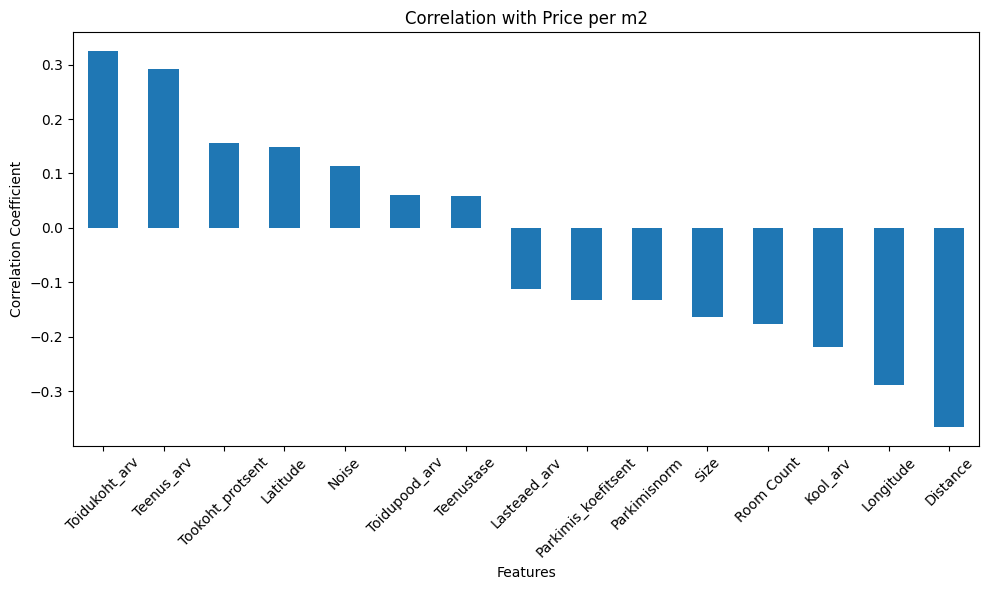

In [4]:
# Calculate correlation matrix
correlation_matrix = df.corr()
price_correlation = correlation_matrix["Price per m2"].sort_values(ascending=False)
price_correlation = price_correlation.drop(["Price per m2", "Price"])
print(price_correlation)

# Visualize the correlations as a bar chart
plt.figure(figsize=(10, 6))
price_correlation.plot(kind='bar')
plt.title("Correlation with Price per m2")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mean Squared Error: 644847.7655031419
Parkimisnorm             126.806948
Lasteaed_arv              25.515125
Teenus_arv                13.835829
Noise                      6.824070
Tookoht_protsent           0.692164
Toidukoht_arv              0.590643
Distance                  -0.375084
Size                      -5.275608
Toidupood_arv             -7.355096
Room Count               -30.684562
Kool_arv                -237.077047
Teenustase              -464.560227
Longitude              -1649.133587
Latitude               -6027.194186
Parkimis_koefitsent   -12756.643509
dtype: float64
R2 Score: 0.30742533352617074


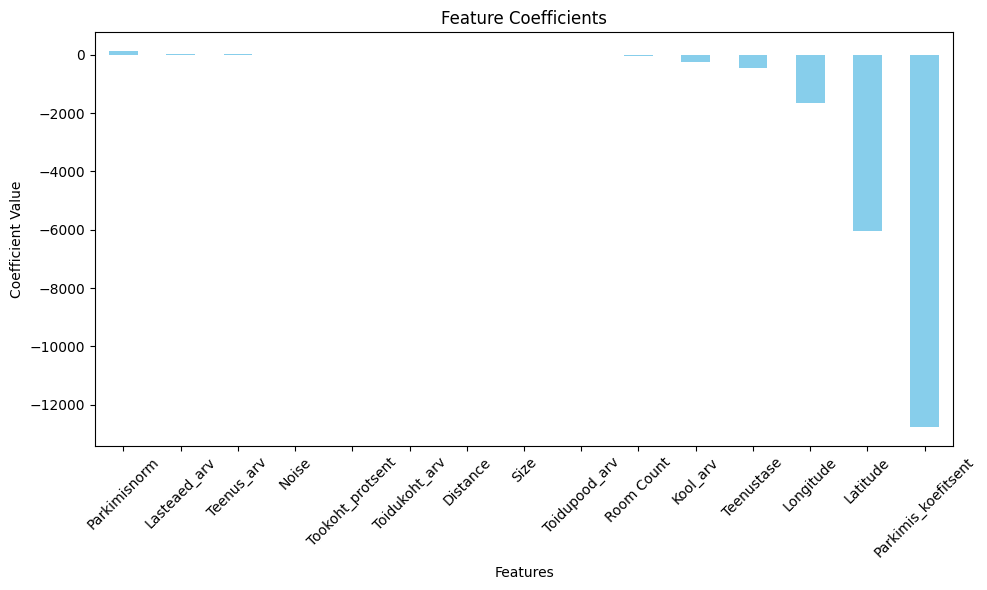

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Define the features and target variable
X = df.drop(columns=["Price per m2", "Price"])
y = df["Price per m2"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the coefficients
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print(coefficients)

# Print r2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Visualize the coefficients as a bar chart
plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar', color='skyblue')
plt.title("Feature Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_49904/1449341329.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace(False, 0).replace(True, 1)


Mean Squared Error: 354433.0552171373
Distance               0.244436
Size                   0.129064
Longitude              0.125572
Latitude               0.103907
Tookoht_protsent       0.088538
Teenus_arv             0.065323
Toidukoht_arv          0.055519
Toidupood_arv          0.041942
Parkimis_koefitsent    0.029404
Lasteaed_arv           0.028636
Parkimisnorm           0.026777
Noise                  0.023404
Room Count             0.020969
Kool_arv               0.009192
Teenustase_1           0.004773
Teenustase_0           0.001610
Teenustase_2           0.000578
Teenustase_0           0.000356
dtype: float64
R2 Score: 0.619334410172329


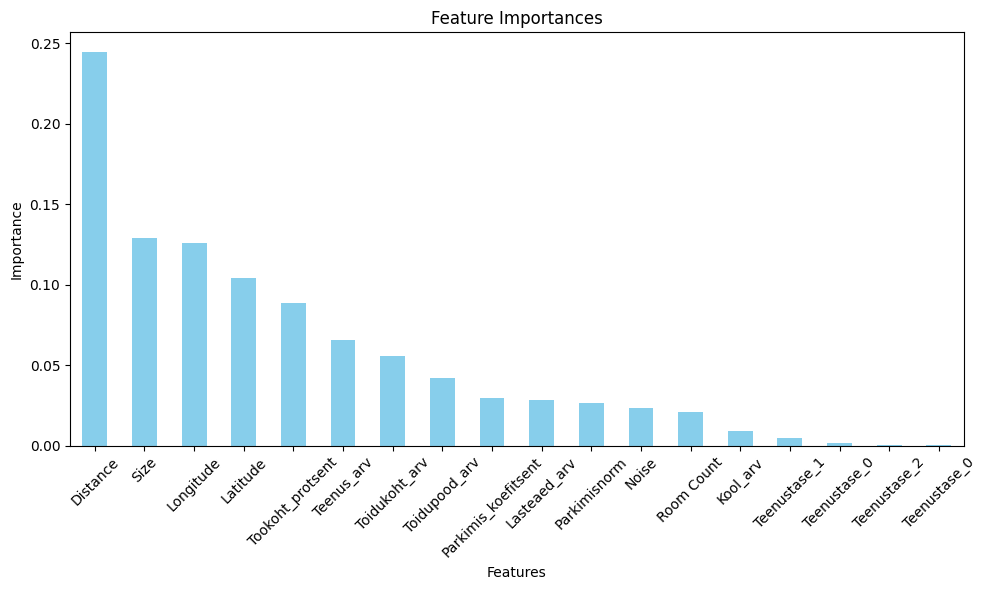

In [6]:
from sklearn.ensemble import RandomForestRegressor

# Define the features and target variable
X = df.drop(columns=["Price per m2", "Price"])

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Convert all false values to 0 and true values to 1
X = X.replace(False, 0).replace(True, 1)

y = df["Price per m2"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Create a random forest regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the feature importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Visualize the feature importances as a bar chart
plt.figure(figsize=(10, 6))
importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mean Squared Error: 578791.7181590036
Distance               0.321064
Size                   0.133787
Teenus_arv             0.097346
Tookoht_protsent       0.087536
Longitude              0.086250
Toidupood_arv          0.082260
Toidukoht_arv          0.054893
Latitude               0.045704
Parkimis_koefitsent    0.027352
Noise                  0.023714
Room Count             0.016544
Lasteaed_arv           0.007622
Parkimisnorm           0.007284
Kool_arv               0.007169
Teenustase_0           0.001015
Teenustase_1           0.000312
Teenustase_2           0.000147
Teenustase_0           0.000000
dtype: float64
R2 Score: 0.37837036490462417


/tmp/ipykernel_49904/477016111.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace(False, 0).replace(True, 1)


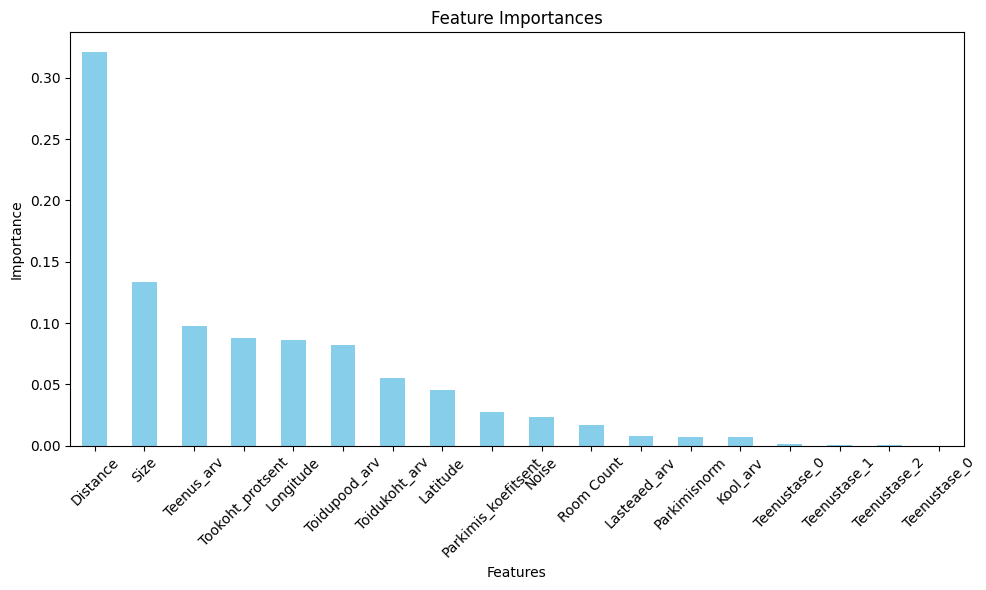

In [7]:
from sklearn.tree import DecisionTreeRegressor

# Define the features and target variable
X = df.drop(columns=["Price per m2", "Price"])

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Convert all false values to 0 and true values to 1
X = X.replace(False, 0).replace(True, 1)

y = df["Price per m2"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Create a decision tree regressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the feature importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

# Print r2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Visualize the feature importances as a bar chart
plt.figure(figsize=(10, 6))
importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

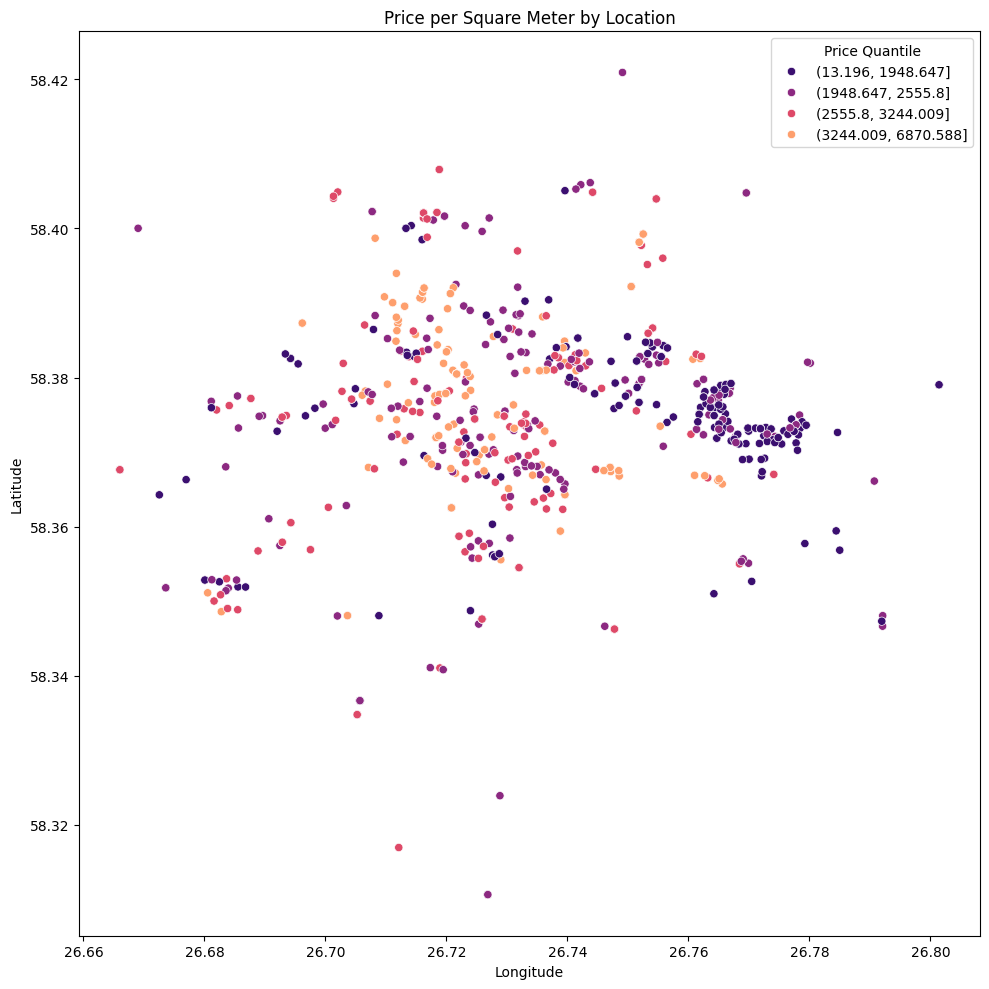

In [8]:
df['Price Quantile'] = pd.qcut(df['Price per m2'], q=4)

# Create heatmap of longitude and latitude and price per square meter
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='Price Quantile', palette='magma', legend='full')
plt.title("Price per Square Meter by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

In [ ]:
df['Price Quantile'] = pd.qcut(df['Price per m2'], q=4)
# Create heatmap of longitude and latitude and price per square meter
plt.rcParams.update({'font.size': 40}) # Manually set font size to make it legible on the scale
plt.figure(figsize=(50, 50))
ax = plt.gca()
ax.set_xlim([26.66, 26.80])
ax.set_ylim([58.33, 58.42])
img = plt.imread("bw_big_tartu.png")
ax.imshow(img, extent=[26.66, 26.80, 58.33, 58.42], aspect='1.90642')  # aspect ratio of the axis (0.14/0.19 = 1.5555) multiplied by the aspect ratio of the image (3999/3263), this corrects for distortions
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='Price Quantile', palette='magma', legend='full', s=400, linewidth=3) # Manually set dot size to make it legible on the scale
plt.title("Price per Square Meter by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.tight_layout()
plt.show()